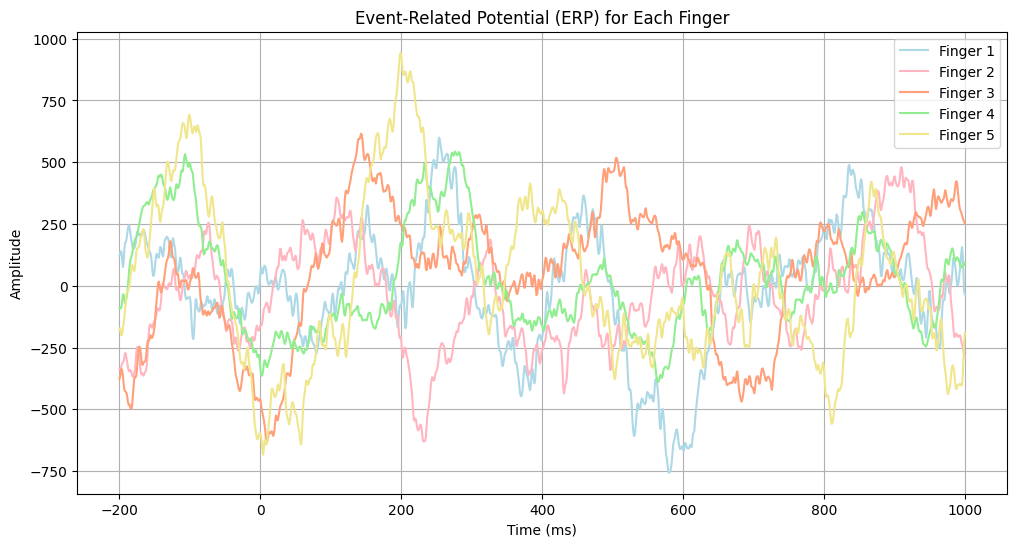

              Time 0      Time 1      Time 2      Time 3      Time 4  \
Finger 1  121.585938  128.078125  140.179688  135.187500  101.851562   
Finger 2 -337.725000 -338.283333 -334.625000 -323.558333 -313.175000   
Finger 3 -377.333333 -367.991667 -346.641667 -336.325000 -344.958333   
Finger 4  -92.447368  -89.542105  -91.615789  -84.073684  -58.947368   
Finger 5 -180.351351 -171.594595 -185.486486 -201.135135 -192.472973   

              Time 5      Time 6      Time 7      Time 8      Time 9  ...  \
Finger 1   75.820312   97.250000  147.015625  173.390625  176.007812  ...   
Finger 2 -309.916667 -304.900000 -288.475000 -272.091667 -274.891667  ...   
Finger 3 -365.325000 -396.366667 -421.033333 -426.291667 -428.466667  ...   
Finger 4  -34.610526  -37.057895  -58.847368  -71.147368  -65.352632  ...   
Finger 5 -170.932432 -151.108108 -126.689189  -96.783784  -61.797297  ...   

           Time 1191   Time 1192   Time 1193   Time 1194   Time 1195  \
Finger 1   14.507812   38.531250

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def calc_mean_erp(trial_points, ecog_data):
    """
    Calculate the mean Event-Related Potential (ERP) for each finger based on trial data
    and ECoG brain signals.

    Parameters:
    trial_points (str): Path to the CSV file containing trial data with columns for
                         starting point, peak point, and finger number.
    ecog_data (str): Path to the CSV file containing ECoG brain data.

    Returns:
    numpy.ndarray: A 5x1201 matrix of the mean ERP for each of the 5 fingers.

    The function also displays a plot of the ERP for each finger.
    """

    # Load trial points and ECoG data from CSV files
    trial_points = pd.read_csv(
        trial_points, header=None, names=["starting_point", "peak_point", "finger"]
    )
    ecog_data = pd.read_csv(ecog_data, header=None, dtype=float)

    # Ensure trial points are numeric, drop rows with errors, and convert to integers
    trial_points_cor = (
        trial_points.apply(pd.to_numeric, errors="coerce").dropna().astype(int)
    )

    # Define the window length: 200 ms before and 1000 ms after the movement
    pre_movement = 200
    post_movement = 1000
    window_length = pre_movement + post_movement + 1  # Total of 1201 time points

    # Initialize an array to store the averaged ERP for each finger
    fingers_erp_mean = np.zeros((5, window_length))

    # Process each finger (1-5) and calculate its mean ERP
    for finger in range(1, 6):
        # Get the trials for the current finger
        finger_trials = trial_points_cor[trial_points_cor["finger"] == finger]
        finger_erp_data = []

        # Extract the ERP data for each trial of the current finger
        for _, trial in finger_trials.iterrows():
            start_idx = trial["starting_point"]
            window_start = start_idx - pre_movement
            window_end = start_idx + post_movement

            # Check if the window is within the bounds of the ECoG data
            if 0 <= window_start < len(ecog_data) and window_end < len(ecog_data):
                window_data = ecog_data.iloc[window_start : window_end + 1, 0].values
                finger_erp_data.append(window_data)

        # Average the ERP data across all trials for the current finger
        if finger_erp_data:
            fingers_erp_mean[finger - 1, :] = np.mean(finger_erp_data, axis=0)

    # Create a time vector from -200 ms to 1000 ms (relative to the movement start)
    time_vector = np.linspace(-pre_movement, post_movement, window_length)

    # Define pastel colors for the plot
    colors = ["lightblue", "lightpink", "lightsalmon", "lightgreen", "khaki"]

    # Plot the ERP for all fingers on a single graph
    plt.figure(figsize=(12, 6))  # Set figure size
    for i, finger in enumerate(range(1, 6)):
        plt.plot(
            time_vector,
            fingers_erp_mean[i, :],
            label=f"Finger {finger}",
            color=colors[i],
        )

    # Set axis labels and title
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude")
    plt.title("Event-Related Potential (ERP) for Each Finger")

    # Add a legend and grid to the plot
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig("finger_erp_mean_graph.png")
    # Show the plot
    plt.show()

    # Format and print the ERP matrix
    fingers_erp_df = pd.DataFrame(
        fingers_erp_mean,
        index=[f"Finger {i+1}" for i in range(5)],
        columns=[f"Time {i}" for i in range(window_length)],
    )
    print(fingers_erp_df)

    # Return the averaged ERP data
    return fingers_erp_mean


# Function usage
trial_points = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Miniproject_2\data\events_file_ordered.csv"
ecog_data_file = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Miniproject_2\data\brain_data_channel_one.csv"
fingers_erp_mean = calc_mean_erp(trial_points, ecog_data_file)
